# Tarjetas Black


Vamos a utilizar un dataset de movimientos de tarjetas de crédito que provienen de [tarjetas Black](https://www.eldiario.es/politica/tarjetas-banquillo-empresarios-sindicalistas-politicos_1_1907519.html). 

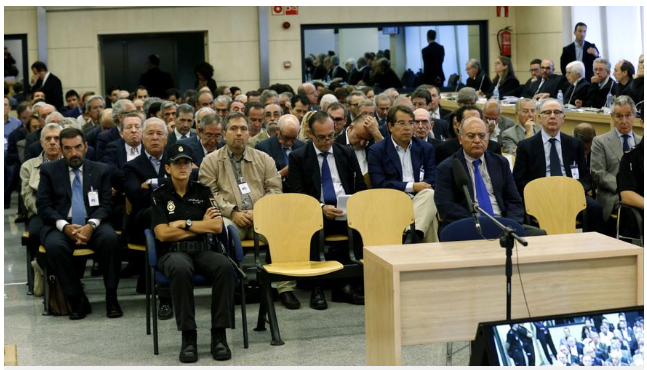

El origen es el siguiente fuente:

https://www.cuartopoder.es/multimedia/2014/10/11/gastos-de-los-exdirectivos-de-caja-madrid-uno-a-uno-con-las-tarjetas-negras-tabla/3403


## Modelo conceptual

<br><br> 

<img src="./images/Modelo_conceptual.png" alt="Example" width="800" height="800">
<br><br> 

## Modelo de relación

<br><br> 

<img src="./images/Modelo_relacion.png" alt="Example" width="500" height="500">

<br><br> 

## Contenido de la información

Contiene la siguiente información:

- Nombre: Nombre de la persona que posee la tarjeta y realiza el movimiento
- Fecha: Fecha del movimiento
- Hora: Hora del movimiento
- Minuto: Minuto del movimiento
- Importe: Importe del movimiento
- Comercio donde se realiza el movimiento
- Actividad Completa: Detalle de la que se dedica el comercio
- Actividad: Contiene una clasificación de la actividad del comercio. Una Actividad puede agrupar a varios comercios
- Función: Función que desempeña la persona dentro de su organización (Sólo para los partidos políticos)
- Organización: Organización a la que pertenece la persona que realiza el gasto

Podrían existir movimientos con campos vacíos.

## Formato del fichero

El fichero con los datos está comprimido, en formato CSV, y utiliza el carácter ~ cómo separador de columnas.


## Preguntas

Vamos a intentar resolver las siguientes preguntas:
    
- Los 10 movimientos mas caros por actividad
- Los 10 movimientos mas caros
- Los movimientos de una persona concreta (ordenados por importe)
- Las 10 personas que mas han gastado
- Importes de una persona agrupados por actividad
- ¿Quién se gasta más, los concejales o los directivos?
- ¿Qué organización se gasta más?
- ¿Qué comercio es más popular entre los miembros?

# Preprocesado de datos

Se realizará un preprocesado de datos cuyo objetico es limpiar y normalizar los datos para que se puedan utilizar más fácilmente por el resto de prácticas  

El formato de salida será un fichero Microsoft Excel que contendrá los siguientes datasets:

- Movimientos: Movimientos donde se han eliminado los atributos personales y se han sustituido por un ID
- Miembros: Dataset con todas las personas que han realzado movimientos

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("./data/black.txt.gz", compression='gzip', sep='~',  index_col=False, low_memory=False)

In [ ]:
df.head()

Nos quedamos sólo con los registros únicos

In [ ]:
df_miembros = df.filter(["nombre", "funcion", "organizacion"]) \
                .drop_duplicates()
df_miembros.head()

Se crea un dataset de miembros, asignado a cada persona un ID único

In [ ]:
df_miembros.sort_values(by = "nombre").assign(
        id_miembro = df_miembros.nombre.rank().astype(int)
).head()

In [ ]:
df_miembros = (df_miembros
    .assign(id_miembro = df_miembros.nombre.rank(method='min').astype(int))
    .filter(['id_miembro', 'nombre', 'funcion', 'organizacion'])
)               

In [ ]:
df_miembros.head()

Se inserta en el dataset principal el ID creado anteriormente

In [ ]:
df_result = pd.merge(df, df_miembros, on = ['nombre', 'funcion', 'organizacion'], how = 'inner')
df_result.head()

Seleccionamos las columnas que nos interesan

In [ ]:
df_movimientos = df_result.filter(
    ['id_miembro','fecha', 'hora', 'minuto', 'importe', 'comercio', 'actividad_completa', 'actividad']
)

Eliminamos la información horaria de la fecha

In [ ]:
df_movimientos = df_movimientos.assign(
    fecha = pd.to_datetime(df['fecha']).dt.date
)
df_movimientos.info()

In [ ]:
df_movimientos.head()

Y por último selecionamos al azar un 10% de los datos para que la práctica sea más ágil ...

In [ ]:
df_movimientos_lite = df_movimientos.sample(frac=0.10, random_state = 1313)
df_movimientos_lite.info()

In [ ]:
df_movimientos_lite.head()

Grabamos el resultado en un fichero Excel donde cada dataset estará en un hoja diferente

In [ ]:
writer = pd.ExcelWriter("./data/black.xlsx")
df_movimientos_lite.to_excel(writer,'Movimientos', index=False)
df_miembros.to_excel(writer, 'Miembros', index=False)
writer.save()